![Pandas Logo](./images/pandas_logo.png)

- Gestión básica de datos y ficheros
    - [Leer y escribir datos en formato de texto](#leer_texto)
    - [Lectura de archivos de texto por partes](#leer_partes)
    - [Escribir datos en formato de texto](#escribir_texto)
    - [Datos JSON](#json)
    - [HTML: Web Scraping](#html)
    - [Leyendo archivos de Microsoft Excel](#excel)
    - [Interactuando con Bases de Datos](#bbdd)
- Fusionar, unir y concatenar
    - [Concatenar objetos](#concatenar)
        - [Establecer la lógica en los otros ejes](#logica)
        - [Ignorar los índices en el eje de concatenación](#ignorar)
        - [Concatenando con dimensiones diferentes](#dimensiones)
        - [Concatenando con claves de grupo](#claves)
    - [Unión/fusión de Series con nombre y DataFrames como bases de datos](#union_fusion)
        - [Breve introducción sobre los métodos de fusión (álgebra relacional)](#introduccion)
        - [Buscando claves duplicadas](#claves_duplicadas)
        - [Uniones con índices y columnas](#uniones)
    - [Agrupar: dividir-aplicar-combinar](#dividir_aplicar_combinar)
        - [Dividir un objeto en grupos](#dividir_en_grupos)
- [Series temporales](#series)
    - [Indexación y Selección](#indexacion)
    - [Rangos de fechas, frecuencias y desplazamiento](#rangos)
    - [Desplazamiento de datos (avance y retroceso)](#avance)
    - [Remuestreo y conversión de frecuencia](#frecuencia)
- [Gráficas directas](#graficas)
    - [Líneas](#lineas)
    - [Barras](#barras)
    - [Tartas](#tartas)
    - [Cajas](#cajas)
    - [Histiogramas](#histiogramas)
    - [Gráficos de dispersión](#dispersion)

---

# Gestión básica de datos y ficheros

El acceso a los datos es un paso necesario para la mayoría de los proesos y herramientas de análisis. La entrada y la salida generalmente se clasifican en algunas categorías principales: leer archivos de texto y otros formatos en disco más eficientes, cargar datos de bases de datos e interactuar con fuentes de red como las API web.
<a id="leer_texto"></a>
## Leer y escribir datos en formato de texto
Pandas presenta una serie de funciones para leer datos tabulares como un objeto DataFrame. La sigueinte tabla resume algunos de ellos, aunque los más utilizados sean `read_csv` y `read_table` (`deprecate`).

|Función|Descripción|
|---|:---|
|read_csv|Carga datos delimitados desde un archivo o URL, la coma (',') es el delimitador predeterminado|
|read_table|Carga datos delimitados desde un archivo o URL, la tabulación ('\ t') es el delimitador predeterminado|
|read_fwf|Lee los datos en formato de columna de ancho fijo (sin delimitadores)|
|read_clipboard|Versión de `read_table` que lee datos del portapapeles|
|read_excel|Lee datos tabulares de un archivo Excel XLS o XLSX|
|read_hdf|Lee archivos HDF5 escritos por pandas|
|read_html|Lee todas las tablas encontradas en el documento HTML dado|
|read_json|Leer datos con formato JSON|
|read_msgpack|Leer datos de pandas codificados usando el formato binario de MessagePack|
|read_pickle|Leer un objeto arbitrario almacenado en formato de pickle de Python|
|read_sas|Lee un conjunto de datos SAS almacenado con los formatos de almacenamiento personalizados de SAS|
|read_sql|Lee los resultados de una consulta SQL (usando SQLAlchemy) como un DataFrame de pandas|
|read_stata|Lee un conjunto de datos de un archivo con formato Stata|
|read_feather|Lee un conjunto de datos de un archivo con formato binario Feather|

De forma general de la mecánica de estas funciones permiten convertir datos de texto en un DataFrame. Los argumentos opcionales para estas funciones pueden caer en algunas categorías:
- Indexación: Puede tratar una o más columnas como el DataFrame devuelto, y si se deben obtener los nombres de las columnas del archivo, el usuario o no.
- Inferencia de tipos y conversión de datos: Esto incluye las conversiones de valor definidas por el usuario y la lista personalizada de marcadores de valor faltantes.
- Análisis de fecha y hora: Incluye la capacidad de combinación, incluida la combinación de información de fecha y hora en varias columnas en una sola columna en el resultado.
- Iteración: Soporte para iterar sobre trozos de archivos muy grandes.
- Limpieza de datos: Omitir filas, comentarios u otras cosas menores como datos numéricos con miles separados por comas.

Debido a lo desordenados que pueden ser los datos en el mundo real, algunas de las funciones de carga de datos (especialmente `read_csv`) se han vuelto muy complejas en sus opciones, por ejemplo `read_csv` tiene más de 50 parámetros diferentes. La documentación de los pandas en línea tiene muchos ejemplos sobre cómo funciona cada uno de ellos, por lo que si tiene dificultades para leer un archivo en particular, puede haber un ejemplo lo suficientemente similar para ayudarlo a encontrar los parámetros correctos.

Algunas de estas funciones, como `read_csv`, realizan inferencia de tipo, porque los tipos de datos forman parte del formato de datos. Eso significa que no necesariamente se tiene que especificar qué columnas son numéricas, enteras, booleanas o de cadena. Otros formatos de datos, como `HDF5`, `Feather` y `MessagePack`, tienen los tipos de datos almacenados en el formato.

In [1]:
import pandas as pd
pd.__version__

'2.2.3'

In [2]:
# cat muestra los contenidos del fichero en pantalla 
!cat ./data/ex1.csv

"cat" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [3]:
# fichero con cabeceras
pd.read_csv('./data/ex1.csv')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [4]:
# fichero sin cabeceras
pd.read_csv('./data/ex2.csv', header=None)

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [5]:
headers = ['a', 'b', 'c', 'd', 'message']
pd.read_csv('./data/ex2.csv', names=headers)

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [6]:
pd.read_csv('./data/ex2.csv', names=headers, index_col='message')

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [7]:
# índice jerárquico de múltiples columnas
!cat ./data/csv_mindex.csv

"cat" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [8]:
pd.read_csv('./data/csv_mindex.csv', index_col=['key1', 'key2'])

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

In [9]:
# Sin delimitador fijo (espacios en blanco, retornos de carro...)
list(open('./data/ex3.txt'))

['            A         B         C\n',
 'aaa -0.264438 -1.026059 -0.619500\n',
 'bbb  0.927272  0.302904 -0.032399\n',
 'ccc -0.264273 -0.386314 -0.217601\n',
 'ddd -0.871858 -0.348382  1.100491\n']

In [10]:
pd.read_csv('./data/ex3.txt', sep='\s+')

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


Debido a que hay un nombre de columna menos que el número de filas de datos, `read_csv` deduce que la primera columna debe ser el índice de DataFrame.

In [11]:
# eliminando filas no válidas del fichero
!cat ./data/ex4.csv

"cat" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [12]:
pd.read_csv('./data/ex4.csv', skiprows=[0, 2, 3])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [13]:
# Manejando datos no presentes o nulos 
!cat ./data/ex5.csv

"cat" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [14]:
pd.read_csv('./data/ex5.csv')

,something,a,b,c,d,message
0,one,1,2,3,4,NaN
1,two,5,6,NaN,8,world
2,three,x,10,x,12,foo


In [15]:
pd.read_csv('./data/ex5.csv', na_values=['x'])

,something,a,b,c,d,message
0,one,1.0,2,3.0,4,NaN
1,two,5.0,6,NaN,8,world
2,three,NaN,10,NaN,12,foo


<a id="leer_partes"></a>
## Lectura de archivos de texto por partes

Cuando se procesan archivos muy grandes es posible que solo se desee leer un fragmento pequeño de un archivo o iterar a través de fragmentos más pequeños del archivo. 

In [16]:
# configuración de visualización de pandas más compacta
pd.options.display.max_rows = 10

In [17]:
pd.read_csv('./data/ex6.csv')

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q
...,...,...,...,...,...
9995,2.311896,-0.417070,-1.409599,-0.515821,L
9996,-0.479893,-0.650419,0.745152,-0.646038,E
9997,0.523331,0.787112,0.486066,1.093156,K
9998,-0.362559,0.598894,-1.843201,0.887292,G


In [18]:
# leer un número específico de filas
pd.read_csv('./data/ex6.csv', nrows=5)

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q


In [19]:
# leer un número específico de filas en base a un tamaño dado
pd.read_csv('./data/ex6.csv', chunksize=1000)

El objeto `TextParser` devuelto por `read_csv` permite iterar sobre las partes del archivo de acuerdo con el tamaño fijado en `chunksize`.

In [20]:
chunker = pd.read_csv('./data/ex6.csv', chunksize=1000)

tot = pd.Series([]) 
for piece in chunker:
    tot = tot.add(piece['key'].value_counts(), fill_value=0)
    
tot = tot.sort_values(ascending=False)
tot[:10]

key
E    368
X    364
L    346
O    343
Q    340
M    338
J    337
F    335
K    334
H    330
dtype: object

`TextParser `también está equipado con un método `get_chunk` que permite leer piezas de un tamaño arbitrario.

<a id="escribir_texto"></a>
## Escribir datos en formato de texto

De forma similar a la que se pueden recuperar datos desde ficheros, los datos también se pueden exportar a un formato texto (delimitado por comas por defecto) usando el método `to_csv` de DataFrame y Series.

In [21]:
data = pd.read_csv('./data/ex5.csv', na_values=['x'])
data

,something,a,b,c,d,message
0,one,1.0,2,3.0,4,NaN
1,two,5.0,6,NaN,8,world
2,three,NaN,10,NaN,12,foo


Podemos definir un separador distinto en el parámetro `sep` y tratar los campos faltantes o nulos a la hora de escribir el fichero usando el parámetro `na_rep`:

In [22]:
data.to_csv('./data/out.csv', sep=';', na_rep='-')
!cat ./data/out.csv

"cat" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


Sin otras opciones especificadas, se escriben las etiquetas de filas y columnas. Dichas opciones pueden ser deshabilitadas:

In [23]:
data.to_csv('./data/out.csv', index=False, header=False, na_rep='NULL')
!cat ./data/out.csv

"cat" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


También se puede seleccionar un subconjunto de las columas disponibles:

In [24]:
data.to_csv('./data/out.csv', index=False, columns=['a', 'b', 'c'])
!cat ./data/out.csv

"cat" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


<a id="json"></a>
## Datos JSON
JSON (abreviatura de *JavaScript Object Notation*) se ha convertido en uno de los formatos estándar para enviar datos mediante solicitud HTTP entre navegadores web y otras aplicaciones. Es un formato de datos mucho más libre que un formato de texto tabular como CSV.

JSON es un código Python casi válido, con la excepción de su valor nulo 'null' y algunos otros matices (como no permitir comas al final de las listas). Los tipos básicos son objetos (dicts), matrices (lists), cadenas, números, booleanos y nulos. Todas las claves de un objeto deben ser cadenas. 

Hay varias bibliotecas de Python para leer y escribir datos JSON. La biblioteca estándar de Python cuenta con `json`. Para convertir una cadena JSON a Python, se utiliza `json.loads`:

In [25]:
obj = """
    {"name": "Wes",
     "places_lived": ["United States", "Spain", "Germany"],
     "pet": null,
     "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},
                  {"name": "Katie", "age": 38,
                   "pets": ["Sixes", "Stache", "Cisco"]}]
} """

import json
result = json.loads(obj)
result

{'name': 'Wes',
 'places_lived': ['United States', 'Spain', 'Germany'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 30, 'pets': ['Zeus', 'Zuko']},
  {'name': 'Katie', 'age': 38, 'pets': ['Sixes', 'Stache', 'Cisco']}]}

Por otra parte, `json.dumps` convierte un objeto Python en una cadena JSON:

In [26]:
asjson = json.dumps(result)
asjson

'{"name": "Wes", "places_lived": ["United States", "Spain", "Germany"], "pet": null, "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]}, {"name": "Katie", "age": 38, "pets": ["Sixes", "Stache", "Cisco"]}]}'

Una forma habitual de pasar un objeto JSON a un DataFrame o alguna otra estructura de datos para su análisis es manejarlos como una lista de diccionarios y seleccionar un subconjunto de los campos de datos:

In [27]:
pd.DataFrame(result['siblings'], columns=['name', 'age'])

,name,age
0,Scott,30
1,Katie,38


La función `read_json` pueden convertir automáticamente los conjuntos de datos JSON en arrays específicos en una serie o en un marco de datos. Las opciones predeterminadas asumen que cada objeto en la matriz JSON es una fila en la tabla resultante:

In [28]:
!cat ./data/example.json

"cat" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [29]:
data = pd.read_json('./data/example.json')
data

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


Para exportar datos datos desde pandas a JSON se puede utilizar el método `to_json`:

In [30]:
data.to_json()

'{"a":{"0":1,"1":4,"2":7},"b":{"0":2,"1":5,"2":8},"c":{"0":3,"1":6,"2":9}}'

In [31]:
data.to_json(orient='records')

'[{"a":1,"b":2,"c":3},{"a":4,"b":5,"c":6},{"a":7,"b":8,"c":9}]'

<a id="html"></a>
## HTML: Web Scraping

Python tiene muchas bibliotecas para leer y escribir datos en los formatos ubicuos de HTML y XML. Los ejemplos incluyen `lxml`, `Beautiful Soup` y `html5lib`. Pandas tiene una función incorporada, `read_html`, que utiliza bibliotecas como las anteriores para analizar automáticamente las tablas de los archivos HTML como objetos DataFrame. La función `read_html` tiene varias opciones, pero por defecto busca e intenta analizar todos los datos tabulares contenidos en las etiquetas `<table>`. El resultado es una lista de objetos DataFrame:

In [34]:
# !pip install lxml

In [35]:
tables = pd.read_html('./data/fdic_failed_bank_list.html')

In [36]:
tables[0].head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Allied Bank,Mulberry,AR,91,Today's Bank,"September 23, 2016","November 17, 2016"
1,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,"August 19, 2016","November 17, 2016"
2,First CornerStone Bank,King of Prussia,PA,35312,First-Citizens Bank & Trust Company,"May 6, 2016","September 6, 2016"
3,Trust Company Bank,Memphis,TN,9956,The Bank of Fayette County,"April 29, 2016","September 6, 2016"
4,North Milwaukee State Bank,Milwaukee,WI,20364,First-Citizens Bank & Trust Company,"March 11, 2016","June 16, 2016"


<a id="excel"></a>
## Leyendo archivos de Microsoft Excel

Pandas también admite la lectura y escritura de datos tabulares en archivos de Excel 2003 (y superiores) utilizando las clases `ExcelFile` y `ExcelWriter` o las funciones `read_excel` y `to_excel`. Internamente, estas herramientas utilizan los paquetes complementarios `xlrd` y `openpyxl` para leer archivos XLS y XLSX, respectivamente (puede que se necesite instalarlos manualmente con pip o conda).

In [37]:
# Crear un objeto ExcelFile es más óptimo cuando se están realizando múltiples lecturas
# xlsx = pd.ExcelFile('./data/ex1.xlsx')
# pd.read_excel(xlsx, 'Sheet1')
frame = pd.read_excel('./data/ex1.xlsx', 'Sheet1', index_col=0)
frame

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [38]:
frame = pd.read_excel('./data/ex1.xlsx', 'Sheet1', index_col=0)
frame

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


Para escribir datos de pandas en formato Excel, primero debe crear un `ExcelWriter`, luego escribir datos en él utilizando el método `to_excel` de los objetos de pandas:

In [39]:
# Crear un objeto ExcelWriter es más óptimo cuando se están realizando múltiples escrituras
# writer = pd.ExcelWriter('./data/ex2.xlsx')
# frame.to_excel(writer, 'Sheet1')
# writer.save()
frame.to_excel('./data/ex2.xlsx')

<a id="bbdd"></a>
## Interactuando con Bases de Datos

En una configuración empresarial, la mayoría de los datos no se pueden almacenar en archivos de texto o Excel. Las bases de datos relacionales basadas en SQL (como SQL Server, PostgreSQL y MySQL) se usan ampliamente. Cargar datos de SQL en un DataFrame es bastante sencillo, y `pandas` tienen algunas funciones para simplificar el proceso. 

In [40]:
# base de datos SQLite utilizando el controlador sqlite3 incorporado de Python
import sqlite3
con = sqlite3.connect('mydata.sqlite')

# Creamos la tabla
query = """
    CREATE TABLE IF NOT EXISTS test
       (a VARCHAR(20), 
        b VARCHAR(20),
        c REAL,
        d INTEGER
       );
"""
con.execute(query)
con.commit()

# Insertamos datos
data = [('Atlanta', 'Georgia', 1.25, 6),
        ('Tallahassee', 'Florida', 2.6, 3),
        ('Sacramento', 'California', 1.7, 5)]
stmt = "INSERT INTO test VALUES(?, ?, ?, ?)"
con.executemany(stmt, data)
con.commit()

La mayoría de los controladores SQL de Python (PyODBC, psycopg2, MySQLdb, pymssql, etc.) devuelven una lista de tuplas al seleccionar datos de una tabla:

In [41]:
# recuperamos los datos
cursor = con.execute('select * from test')
rows = cursor.fetchall()
rows

[('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5)]

Se puede pasar la lista de tuplas al constructor del DataFrame, pero también se necesitan los nombres de las columnas, contenidos en la descripción del cursor:

In [42]:
cursor.description

(('a', None, None, None, None, None, None),
 ('b', None, None, None, None, None, None),
 ('c', None, None, None, None, None, None),
 ('d', None, None, None, None, None, None))

In [43]:
pd.DataFrame(rows, columns=[x[0] for x in cursor.description])

,a,b,c,d
0,Atlanta,Georgia,1.25,6
1,Tallahassee,Florida,2.60,3
2,Sacramento,California,1.70,5


In [44]:
con.close()

El proyecto `SQLAlchemy` es un popular kit de herramientas SQL de Python que extrae muchas de las diferencias comunes entre las bases de datos SQL. pandas tiene una función `read_sql` que permite leer datos fácilmente desde una conexión general de SQLAlchemy.

In [45]:
import sqlalchemy as sqla
db = sqla.create_engine('sqlite:///mydata.sqlite')
pd.read_sql('select * from test', db)

,a,b,c,d
0,Atlanta,Georgia,1.25,6
1,Tallahassee,Florida,2.60,3
2,Sacramento,California,1.70,5


In [46]:
db.dispose()

# Fusionar, unir y concatenar

pandas ofrece varias facilidades para combinar fácilmente Series y DataFrame con varios tipos de lógica de conjuntos para los índices y la funcionalidad de álgebra relacional en el caso de operaciones de unión/concatenación.
<a id="concatenar"></a>
## Concatenar objetos
La función `concat` hace todo el trabajo pesado de realizar operaciones de concatenación a lo largo de un eje mientras realiza la lógica de conjunto opcional (unión o intersección) de los índices (si los hay) en los otros ejes. Similar a la función `numpy.concatenate` en ndarrays, `pandas.concat` toma una lista o diccionario de objetos tipificados homogéneamente y los concatena con un manejo configurable de "qué hacer con los otros ejes":

```python
pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)
```

In [47]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

result = pd.concat([df1, df2, df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
...,...,...,...,...
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10


Supongamos que quisiéramos asociar claves específicas con cada una de las piezas del DataFrame cortado. Podemos hacer esto usando el argumento claves:

In [48]:
result = pd.concat([df1, df2, df3], keys=['x', 'y', 'z'])
# equivalente pd.concat({'x': df1, 'y': df2, 'z': df3})
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
...   ...  ...  ...  ...
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

[12 rows x 4 columns]

In [49]:
result.index.levels

FrozenList([['x', 'y', 'z'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]])

In [50]:
result.loc['y']

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


Un atajo útil para `concat` son los métodos de instancia de `append` en Series y DataFrame. Estos métodos en realidad son anteriores al concat. Ellos concatenan a lo largo del `eje = 0`, es decir, el índice.

>**Nota**: Vale la pena señalar que `concat` (y, por lo tanto, `append`) hace una copia completa de los datos, y que la reutilización constante de esta función puede crear un impacto significativo en el rendimiento. Si necesita usar la operación sobre varios conjuntos de datos, use una lista de comprensión.

<a id="logica"></a>
### Establecer la lógica en los otros ejes

Al pegar varios DataFrames, se puede elegir cómo manejar los otros ejes (aparte del que está concatenado). Esto se puede hacer de las siguientes tres maneras:
- La unión de todos ellos, `join='outer'`. Esta es la opción predeterminada, ya que da como resultado una pérdida de información cero.
- La intersección, `join='inner'`.
- La utilización de un índice específico, pasado al argumento `join_axes`.

In [51]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

result = pd.concat([df1, df4], axis=1, sort=False)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [52]:
result = pd.concat([df1, df4], axis=1, join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [53]:
result = pd.concat([df1, df4], axis=1)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


<a id="ignorar"></a>
### Ignorar los índices en el eje de concatenación

Para los objetos DataFrame que no tienen un índice significativo, es posible que se desee agregarlos e ignorar el hecho de que pueden tener índices superpuestos. Para hacer esto, usa el argumento ignore_index:

In [54]:
result = pd.concat([df1, df4], ignore_index=True, sort=False)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


<a id="dimensiones"></a>
### Concatenando con dimensiones diferentes

Se puede concatenar una mezcla de objetos Series y DataFrame. 

In [55]:
# en una serie con nombre el nombre de la Serie se transforma en el nombre de la columna
s1 = pd.Series(['X0', 'X1', 'X2', 'X3'], name='X')
result = pd.concat([df1, s1], axis=1)
result

,A,B,C,D,X
0,A0,B0,C0,D0,X0
1,A1,B1,C1,D1,X1
2,A2,B2,C2,D2,X2
3,A3,B3,C3,D3,X3


In [56]:
# las series sin nombre hacen que se numeren consecutivamente las nuevas columnas
s2 = pd.Series(['_0', '_1', '_2', '_3'])
result = pd.concat([df1, s2, s2, s2], axis=1)
result

,A,B,C,D,0,1,2
0,A0,B0,C0,D0,_0,_0,_0
1,A1,B1,C1,D1,_1,_1,_1
2,A2,B2,C2,D2,_2,_2,_2
3,A3,B3,C3,D3,_3,_3,_3


In [57]:
# si se ingnoran los índices, los nombres de las columnas no se tiene en cuenta
result = pd.concat([df1, s1], axis=1, ignore_index=True)
result

,0,1,2,3,4
0,A0,B0,C0,D0,X0
1,A1,B1,C1,D1,X1
2,A2,B2,C2,D2,X2
3,A3,B3,C3,D3,X3


<a id="claves"></a>
### Concatenando con claves de grupo
Un uso bastante común del argumento `keys` es anular los nombres de columna al crear un nuevo DataFrame basado en una serie existente. 

In [58]:
s3 = pd.Series([0, 1, 2, 3], name='foo')
s4 = pd.Series([0, 1, 2, 3])
s5 = pd.Series([0, 1, 4, 5])
pd.concat([s3, s4, s5], axis=1)

,foo,0,1
0,0,0,0
1,1,1,1
2,2,2,4
3,3,3,5


In [59]:
pd.concat([s3, s4, s5], axis=1, keys=['red', 'blue', 'yellow'])

,red,blue,yellow
0,0,0,0
1,1,1,1
2,2,2,4
3,3,3,5


In [60]:
pieces = {'x': df1, 'y': df2, 'z': df3}
result = pd.concat(pieces)
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
...   ...  ...  ...  ...
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

[12 rows x 4 columns]

In [61]:
result.index.levels

FrozenList([['x', 'y', 'z'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]])

In [62]:
pd.concat(pieces, keys=['z', 'y'])

A    B    C    D
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7

In [63]:
result.loc[['z', 'y']]

A    B    C    D
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7

<a id="union_fusion"></a>
## Unión/fusión de Series con nombre y DataFrames como bases de datos 
pandas tiene operaciones de unión en memoria de alto rendimiento con todas las funciones idiomáticamente muy similares a las bases de datos relacionales como SQL. Estos métodos tienen un rendimiento significativamente mejor (en algunos casos, más de un orden de magnitud mejor) que otras implementaciones de código abierto (como `base::merge.data.frame` en `R`). La razón de esto es el cuidadoso diseño algorítmico y el diseño interno de los datos en DataFrame.

pandas proporciona una función única, `merge`, como punto de entrada para todas las operaciones de unión de base de datos estándar entre DataFrame o Series con nombre:
```python
pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
```
<a id="introduccion"></a>
### Breve introducción sobre los métodos de fusión (álgebra relacional)
Los usuarios experimentados de bases de datos relacionales como SQL estarán familiarizados con la terminología utilizada para describir las operaciones de unión entre dos estructuras similares a tablas SQL (objetos DataFrame). Hay varios casos a considerar que son muy importantes de entender:
- uniones uno a uno: por ejemplo, al unir dos objetos DataFrame sobre sus índices (que deben contener valores únicos).
- muchos a uno se unen: por ejemplo, al unir un índice (único) a una o más columnas en un DataFrame diferente.
- muchas a muchas combinaciones: unir columnas en columnas.

In [64]:
# ejemplo básico con una combinación de claves únicas
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

result = pd.merge(left, right, on='key')
result

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [65]:
# combinación con múltiples clave (intersección de claves por defecto, how='inner')

In [66]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

result = pd.merge(left, right, on=['key1', 'key2'])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


El argumento `how` especifica cómo determinar qué claves se incluirán en la tabla resultante. Si una combinación de  claves que no aparece en las tablas izquierda o derecha, los valores en la tabla combinada serán `NA`. La siguiente tabla resume las opciones y equivalentes de SQL:  

|Método|SQL|Decripción|
|---|:---|:---|
|left|LEFT OUTER JOIN|Utiliza sólo las claves de la izquierda|
|right|RIGHT OUTER JOIN|Utiliza sólo las claves de la derecha|
|outer|FULL OUTER JOIN|Utiliza la unión de las claves|
|inner|INNER JOIN|Utiliza la intersección de las claves|



<a id="claves_duplicadas"></a>
### Buscando claves duplicadas
Los usuarios pueden usar el argumento `validate` para verificar automáticamente si hay duplicados inesperados en sus claves de combinación. La unicidad de la clave se verifica antes de las operaciones de combinación y, por lo tanto, protege contra los desbordamientos de memoria. La verificación de la singularidad de las claves también es una buena forma de garantizar que las estructuras de datos de los usuarios sean las esperadas.

In [67]:
# valores duplicados de B en el DataFrame derecho
left = pd.DataFrame({'A' : [1,2], 'B' : [1, 2]})
right = pd.DataFrame({'A' : [4,5,6], 'B': [2, 2, 2]})
result = pd.merge(left, right, on='B', how='outer', validate="one_to_one")

MergeError: Merge keys are not unique in right dataset; not a one-to-one merge

Si el usuario conoce los duplicados en el DataFrame derecho pero quiere asegurarse de que no haya duplicados en el DataFrame izquierdo, se puede usar el argumento `validate = 'one_to_many'` en su lugar, lo que no generará una excepción.

In [69]:
# valores duplicados de B en el DataFrame derecho
pd.merge(left, right, on='B', how='outer', validate="one_to_many")

,A_x,B,A_y
0,1,1,NaN
1,2,2,4.0
2,2,2,5.0
3,2,2,6.0


Si el argumento `indicator` es `True`, se agregará una columna de tipo categórico llamada `_merge` al objeto de salida que informa sobre el tipo de operación realizada. También admite argumentos de cadena para poner nombre a la columna del indicador.

La fusión conservará el `dtype` de las claves de unión. Si la columna tiene valores `NA` el dtype resultante será upcast.

<a id="uniones"></a>
### Uniones con índices y columnas
El método `join` permite combinar las columnas de dos DataFrames indexados potencialmente diferentes en un DataFrame de un solo resultado. 

In [70]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                    index=['K0', 'K1', 'K2'])

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                     index=['K0', 'K2', 'K3'])

result = left.join(right)
result

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


La alineación de los datos aquí está en los índices (etiquetas de fila). Este mismo comportamiento se puede lograr mediante `merge` más argumentos adicionales que le indiquen que use los índices:

In [71]:
# result = pd.merge(left, right, left_index=True, right_index=True, how='inner')
result = left.join(right, how='inner')
result

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


In [72]:
# result = pd.merge(left, right, left_index=True, right_index=True, how='outer')
result = left.join(right, how='outer')
result

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


El método `join` tiene el argumento opcional `on` que puede ser una columna o varios nombres de columna, y que especifica que el DataFrame pasado se alineará en esa columna en el DataFrame. 

In [73]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3'],
                     'key': ['K0', 'K1', 'K0', 'K1']})

right = pd.DataFrame({'C': ['C0', 'C1'],
                      'D': ['D0', 'D1']},
                     index=['K0', 'K1'])

# result = pd.merge(left, right, left_on='key', right_index=True, how='left', sort=False)
result = left.join(right, on='key')
result

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K0,C0,D0
3,A3,B3,K1,C1,D1


<a id="dividir_aplicar_combinar"></a>
# Agrupar: dividir-aplicar-combinar

Por "agrupar por" (*group by*) nos referimos a un proceso que involucra uno o más de los siguientes pasos:
- Dividir los datos en grupos según algunos criterios.
- Aplicar una función a cada grupo de forma independiente.
- Combinar los resultados en una estructura de datos.

De éstos, el paso de división es el más sencillo. De hecho, en muchas situaciones podemos desear dividir el conjunto de datos en grupos y hacer algo con esos grupos. En el paso de aplicación, podríamos desear uno de los siguientes:
- Agregación: calcular una estadística de resumen (o estadísticas) para cada grupo. Algunos ejemplos:
    - Calcular sumas o medios grupales.
    - Calcular los tamaños / conteos de los grupos.
- Transformación: realizar algunos cálculos específicos del grupo y devolver un objeto indexado. Algunos ejemplos:
    - Estandarizar los datos (`zscore`) dentro de un grupo.
    - Rellenar `NA` dentro de grupos con un valor derivado de cada grupo.
- Filtración: descartar algunos grupos, de acuerdo con un cálculo grupal que evalúa `True` o `False`. Algunos ejemplos:
    - Descartar los datos que pertenecen a grupos con solo unos pocos miembros.
    - Filtrar los datos según la suma o la media del grupo.
- Alguna combinación de lo anterior: GroupBy examinará los resultados del paso de aplicación e intentará obtener un resultado sensiblemente combinado si no encaja en ninguna de las dos categorías anteriores.

<a id="dividir_en_grupos"></a>
## Dividir un objeto en grupos
Los objetos pandas se pueden dividir en cualquiera de sus ejes. La definición abstracta de agrupación es proporcionar una asignación de etiquetas a nombres de grupo.

El mapeo a grupos se puede especificar de muchas maneras diferentes:
- Una función de Python, para ser llamada en cada una de las etiquetas de eje.
- Una lista o matriz NumPy de la misma longitud que el eje seleccionado.
- Un diccionario de Series, proporcionando un mapeo `etiqueta -> grupo`.
- Para los objetos DataFrame, una cadena que indica una columna que se utilizará para agrupar. Por supuesto, `df.groupby ('A')` es solo azúcar sintáctica para `df.groupby (df ['A'])`, pero hace la vida más sencilla.
- Para los objetos DataFrame, una cadena que indica un nivel de índice que se utilizará para agrupar.
- Una lista de cualquiera de las cosas anteriores.

In [74]:
from numpy import nan as NA
df = pd.DataFrame([('bird', 'Falconiformes', 389.0),
                   ('bird', 'Psittaciformes', 24.0),
                   ('mammal', 'Carnivora', 80.2),
                   ('mammal', 'Primates', NA),
                   ('mammal', 'Carnivora', 58)],
                  index=['falcon', 'parrot', 'lion', 'monkey', 'leopard'],
                  columns=('class', 'order', 'max_speed'))
df

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [75]:
# por defecto axis=0
grouped = df.groupby('class')
grouped

In [76]:
grouped.groups

{'bird': ['falcon', 'parrot'], 'mammal': ['lion', 'monkey', 'leopard']}

In [77]:
len(grouped)

2

In [78]:
for name, group in grouped:
    print('Grupo: ' + str(name))
    print("-" * 40)
    print(group, end="\n\n")

Grupo: bird
----------------------------------------
       class           order  max_speed
falcon  bird   Falconiformes      389.0
parrot  bird  Psittaciformes       24.0

Grupo: mammal
----------------------------------------
          class      order  max_speed
lion     mammal  Carnivora       80.2
monkey   mammal   Primates        NaN
leopard  mammal  Carnivora       58.0



In [79]:
grouped.get_group('bird')

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0


Una vez que se ha creado el grupo (objeto GroupBy), hay múltiples métodos disponibles para realizar un cálculo en los datos agrupados:

In [80]:
grouped.size()

class
bird      2
mammal    3
dtype: int64

In [81]:
grouped.sum()

,order,max_speed
class,,
bird,FalconiformesPsittaciformes,413.0
mammal,CarnivoraPrimatesCarnivora,138.2


In [82]:
grouped.describe()

max_speed                                                       
           count   mean         std   min     25%    50%     75%    max
class                                                                  
bird         2.0  206.5  258.093975  24.0  115.25  206.5  297.75  389.0
mammal       2.0   69.1   15.697771  58.0   63.55   69.1   74.65   80.2

In [83]:
grouped['max_speed'].agg(['sum', 'mean', 'std'])

,sum,mean,std
class,,,
bird,413.0,206.5,258.093975
mammal,138.2,69.1,15.697771


In [84]:
grouped.agg({'max_speed': 'sum', 'order': lambda x: ", ".join(x)})

,max_speed,order
class,,
bird,413.0,"Falconiformes, Psittaciformes"
mammal,138.2,"Carnivora, Primates, Carnivora"


<a id="series"></a>
# Series temporales
Las series de datos temporales son una forma importante de datos estructurados en muchos campos diferentes, como finanzas, economía, ecología, neurociencia y física. Todo lo que se observa o mide en diferentes puntos en el tiempo forma una serie temporal.

La biblioteca estándar de Python incluye tipos de datos para datos de fecha y hora, así como funciones relacionadas con el calendario. Los módulos `date`, `time` y `calendar` son sus elementos principales. El tipo `datetime.datetime`, o simplemente `datetime`, se usa ampliamente:

In [85]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2024, 11, 8, 22, 47, 15, 985214)

In [86]:
now.year, now.month, now.day

(2024, 11, 8)

`datetime` almacena tanto la fecha como la hora en microsegundos, `timedelta` representa la diferencia temporal entre dos objetos de fecha y hora:

In [87]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [88]:
delta.days, delta.seconds

(926, 56700)

Como en otros lenguajes existen difernetes funciones que permiten la conversión entre cadenas de texto y objetos fecha-hora y viceversa como `datetime.strftime` o `datetime.strptime`.
<a id="indexacion"></a>
## Indexación y Selección
Las series temporales se comportan como cualquier `Serie` o `DataFrame` de `pandas` cuando se está indexando y seleccionando datos en función de las etiquetas:

In [89]:
AAPL = pd.read_csv('./data/Yahoo/AAPL.csv', index_col='Date', parse_dates=['Date'])
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,116.330002,114.760002,115.800003,116.150002,28781900.0,111.709831
2017-01-04,116.510002,115.750000,115.849998,116.019997,21118100.0,111.584778
2017-01-05,116.860001,115.809998,115.919998,116.610001,22193600.0,112.152229
2017-01-06,118.160004,116.470001,116.779999,117.910004,31751900.0,113.402542
2017-01-09,119.430000,117.940002,117.949997,118.989998,33561900.0,114.441246


In [90]:
price = AAPL['Adj Close']
price.head()

Date
2017-01-03    111.709831
2017-01-04    111.584778
2017-01-05    112.152229
2017-01-06    113.402542
2017-01-09    114.441246
Name: Adj Close, dtype: float64

In [91]:
price['2017-01-04']  # equivalente a price['20170104']

111.58477783203124

In [92]:
AAPL.loc['2017-01-04']  # equivalente a AAPL.loc['20170104']

High         1.165100e+02
Low          1.157500e+02
Open         1.158500e+02
Close        1.160200e+02
Volume       2.111810e+07
Adj Close    1.115848e+02
Name: 2017-01-04 00:00:00, dtype: float64

Se puede pasar un año o solo un año y un mes para seleccionar fácilmente segmentos de datos:

In [93]:
price['2017-01']

Date
2017-01-03    111.709831
2017-01-04    111.584778
2017-01-05    112.152229
2017-01-06    113.402542
2017-01-09    114.441246
                 ...    
2017-01-25    117.220779
2017-01-26    117.278488
2017-01-27    117.288101
2017-01-30    116.980324
2017-01-31    116.711029
Name: Adj Close, Length: 20, dtype: float64

In [94]:
AAPL.loc['2017-01']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,116.330002,114.760002,115.800003,116.150002,28781900.0,111.709831
2017-01-04,116.510002,115.750000,115.849998,116.019997,21118100.0,111.584778
2017-01-05,116.860001,115.809998,115.919998,116.610001,22193600.0,112.152229
2017-01-06,118.160004,116.470001,116.779999,117.910004,31751900.0,113.402542
2017-01-09,119.430000,117.940002,117.949997,118.989998,33561900.0,114.441246
...,...,...,...,...,...,...
2017-01-25,122.099998,120.279999,120.419998,121.879997,32377600.0,117.220779
2017-01-26,122.440002,121.599998,121.669998,121.940002,26337600.0,117.278488
2017-01-27,122.349998,121.599998,122.139999,121.949997,20562900.0,117.288101


In [95]:
price[:'2017-01-06']

Date
2017-01-03    111.709831
2017-01-04    111.584778
2017-01-05    112.152229
2017-01-06    113.402542
Name: Adj Close, dtype: float64

In [96]:
AAPL[:'2017-01-06']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,116.330002,114.760002,115.800003,116.150002,28781900.0,111.709831
2017-01-04,116.510002,115.750000,115.849998,116.019997,21118100.0,111.584778
2017-01-05,116.860001,115.809998,115.919998,116.610001,22193600.0,112.152229
2017-01-06,118.160004,116.470001,116.779999,117.910004,31751900.0,113.402542


Debido a que la mayoría de las series temporales se ordenan cronológicamente, las consulta de rango pueden utilizar sellos de tiempo no contenidos en la serie:

In [97]:
# equivalente a price.truncate(before='2017-01-01', after='2017-01-07')
price['2017-01-01':'2017-01-07']

Date
2017-01-03    111.709831
2017-01-04    111.584778
2017-01-05    112.152229
2017-01-06    113.402542
Name: Adj Close, dtype: float64

In [98]:
# equivalente a AAPL.truncate(before='2017-01-01', after='2017-01-07')
AAPL['2017-01-01':'2017-01-07']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,116.330002,114.760002,115.800003,116.150002,28781900.0,111.709831
2017-01-04,116.510002,115.750000,115.849998,116.019997,21118100.0,111.584778
2017-01-05,116.860001,115.809998,115.919998,116.610001,22193600.0,112.152229
2017-01-06,118.160004,116.470001,116.779999,117.910004,31751900.0,113.402542


<a id="rangos"></a>
## Rangos de fechas, frecuencias y desplazamiento
Se supone que las series temporales genéricas en pandas son irregulares, es decir, no tienen una frecuencia fija. Para muchas aplicaciones esto es suficiente. Sin embargo, a menudo es conveniente trabajar en relación con una frecuencia fija, como diaria, mensual o cada 15 minutos, incluso si eso significa introducir valores perdidos en una serie de tiempo. Afortunadamente, pandas tienen un conjunto completo de frecuencias de serie estándar y herramientas para remuestrear, inferir frecuencias y generar rangos de fechas de frecuencia fija. 

### Generando rangos de fechas
`pandas.date_range` es responsable de generar un `DatetimeIndex` con una longitud indicada de acuerdo a una frecuencia particular:

In [99]:
index = pd.date_range('2019-01-01', '2019-01-10')
index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10'],
              dtype='datetime64[ns]', freq='D')

Por defecto, `date_range` genera marcas de tiempo diarias. Si solo pasa una fecha de inicio o finalización, se debe pasar una cantidad de períodos para generar. También se puede indicar la frecuencia a utilizar entre cada entrada del índice.

In [100]:
pd.date_range(start='2019-01-01', periods=10)

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10'],
              dtype='datetime64[ns]', freq='D')

In [101]:
pd.date_range(start='2019-01-01', periods=10, freq='B')

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14'],
              dtype='datetime64[ns]', freq='B')

In [102]:
pd.date_range(start='2019-01-01 08:00:00', periods=9, freq='2H')

C:\Users\mfcardenas\AppData\Local\Temp\ipykernel_33844\2180176746.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range(start='2019-01-01 08:00:00', periods=9, freq='2H')


DatetimeIndex(['2019-01-01 08:00:00', '2019-01-01 10:00:00',
               '2019-01-01 12:00:00', '2019-01-01 14:00:00',
               '2019-01-01 16:00:00', '2019-01-01 18:00:00',
               '2019-01-01 20:00:00', '2019-01-01 22:00:00',
               '2019-01-02 00:00:00'],
              dtype='datetime64[ns]', freq='2h')

In [103]:
pd.date_range(start='2019-01', periods=8, freq='WOM-3FRI')

DatetimeIndex(['2019-01-18', '2019-02-15', '2019-03-15', '2019-04-19',
               '2019-05-17', '2019-06-21', '2019-07-19', '2019-08-16'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

<a id="avance"></a>
## Desplazamiento de datos (avance y retroceso)
"Desplazar" se refiere a mover datos hacia atrás y hacia adelante a través del tiempo. Tanto Series como DataFrame tienen un método `shift`de desplazamiento para ir hacia adelante o hacia atrás por los datos, dejando el índice sin modificar:

In [104]:
price['2017-01-03':'2017-01-07'].shift(3, freq='D')

Date
2017-01-06    111.709831
2017-01-07    111.584778
2017-01-08    112.152229
2017-01-09    113.402542
Name: Adj Close, dtype: float64

In [105]:
price['2017-01-03':'2017-01-07'].shift(-4, freq='D')

Date
2016-12-30    111.709831
2016-12-31    111.584778
2017-01-01    112.152229
2017-01-02    113.402542
Name: Adj Close, dtype: float64

<a id="frecuencia"></a>
## Remuestreo y conversión de frecuencia
El remuestreo se refiere al proceso de convertir una serie de tiempo de una frecuencia a otra. La agregación de datos de frecuencias más altas a frecuencias más bajas se denomina *downsampling*, mientras que la conversión de frecuencias más bajas a frecuencias más altas se llama *upsampling*.

Los objetos pandas están equipados con el método `resample`, que es la función central para todas las conversiones de frecuencia. Tiene una API similar a la de `groupby`, se llama a `resample` para agrupar los datos y aplicar una función de agregación.

### Downsampling
Cuando se pasa de una frecuencia más alta a una más baja es necesario aplicar un proceso de agregación para no perder información.

In [106]:
price['2017'].resample('M').mean()

C:\Users\mfcardenas\AppData\Local\Temp\ipykernel_33844\2795581603.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  price['2017'].resample('M').mean()


Date
2017-01-31    114.999078
2017-02-28    128.988916
2017-03-31    135.828642
2017-04-30    138.020382
2017-05-31    147.433160
                 ...    
2017-08-31    154.663035
2017-09-30    153.469347
2017-10-31    153.672636
2017-11-30    168.280443
2017-12-31    167.978944
Freq: ME, Name: Adj Close, Length: 12, dtype: float64

In [107]:
price['2017'].resample('M', kind='period').mean()

C:\Users\mfcardenas\AppData\Local\Temp\ipykernel_33844\1468744053.py:1: FutureWarning: The 'kind' keyword in Series.resample is deprecated and will be removed in a future version. Explicitly cast the index to the desired type instead
  price['2017'].resample('M', kind='period').mean()
C:\Users\mfcardenas\AppData\Local\Temp\ipykernel_33844\1468744053.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  price['2017'].resample('M', kind='period').mean()


Date
2017-01    114.999078
2017-02    128.988916
2017-03    135.828642
2017-04    138.020382
2017-05    147.433160
              ...    
2017-08    154.663035
2017-09    153.469347
2017-10    153.672636
2017-11    168.280443
2017-12    167.978944
Freq: M, Name: Adj Close, Length: 12, dtype: float64

In [108]:
price['2017'].resample('M').ohlc()

C:\Users\mfcardenas\AppData\Local\Temp\ipykernel_33844\2739796370.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  price['2017'].resample('M').ohlc()


,open,high,low,close
Date,,,,
2017-01-31,111.709831,117.288101,111.584778,116.711029
2017-02-28,123.828148,132.440292,123.616562,132.324371
2017-03-31,135.028976,139.211563,133.956802,138.767197
2017-04-30,138.805832,139.839371,135.888687,138.757538
2017-05-31,141.587769,151.405930,141.539459,148.166336
...,...,...,...,...
2017-08-31,145.537842,159.692978,145.537842,159.692978
2017-09-30,159.741684,159.741684,146.596222,150.072464
2017-10-31,149.770599,164.600632,149.449265,164.600632


### Upsampling
Cuando se connvierte de una frecuencia baja a otra mayor no es necesario aplicar una agregación.

In [109]:
price['2017-01-03':'2017-01-05']

Date
2017-01-03    111.709831
2017-01-04    111.584778
2017-01-05    112.152229
Name: Adj Close, dtype: float64

In [110]:
price12 = price['2017-01-03':'2017-01-05'].resample('12H').asfreq()
price12

C:\Users\mfcardenas\AppData\Local\Temp\ipykernel_33844\516899318.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  price12 = price['2017-01-03':'2017-01-05'].resample('12H').asfreq()


Date
2017-01-03 00:00:00    111.709831
2017-01-03 12:00:00           NaN
2017-01-04 00:00:00    111.584778
2017-01-04 12:00:00           NaN
2017-01-05 00:00:00    112.152229
Freq: 12h, Name: Adj Close, dtype: float64

In [111]:
price['2017-01-03':'2017-01-05'].resample('12H').ffill()

C:\Users\mfcardenas\AppData\Local\Temp\ipykernel_33844\1270540977.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  price['2017-01-03':'2017-01-05'].resample('12H').ffill()


Date
2017-01-03 00:00:00    111.709831
2017-01-03 12:00:00    111.709831
2017-01-04 00:00:00    111.584778
2017-01-04 12:00:00    111.584778
2017-01-05 00:00:00    112.152229
Freq: 12h, Name: Adj Close, dtype: float64

<a id="graficas"></a>
# Gráficas directas

Pandas proporciona opciones integradas para realizar visualizaciones de los datos que maneja, tanto a nivel de serie como de DataFrame:

In [112]:
dataset = pd.read_csv("./data/Salaries.csv")
rank = dataset['rank']
discipline = dataset['discipline']
phd = dataset['phd']
service = dataset['service']
sex = dataset['sex']
salary = dataset['salary']
dataset.head()

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800


<a id="lineas"></a>
## Líneas
Muestran la evolución de un conjunto de variables. 

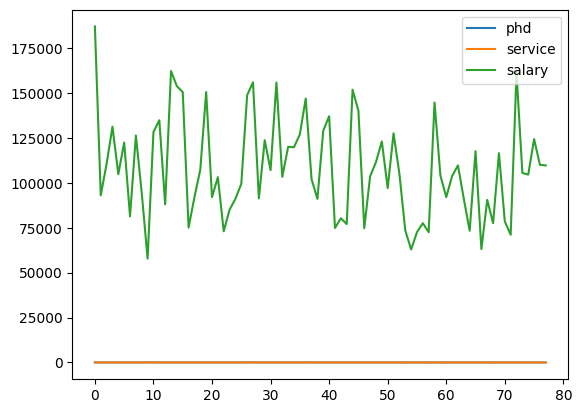

In [113]:
dataset[["rank", "discipline","phd","service", "sex", "salary"]].plot();

Es importante tener en cuenta la naturaleza de la información que queremos visualizar y en caso de valores numéricos la maginitud de las unidades utilizadas.

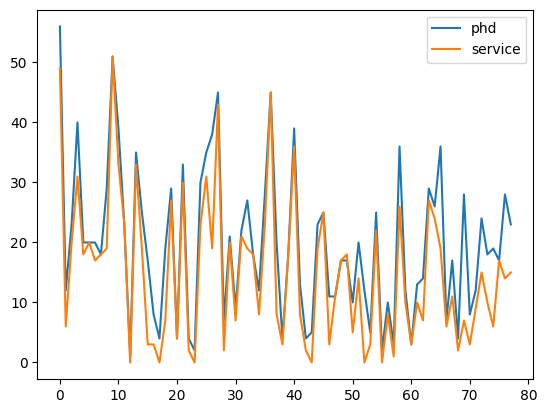

In [114]:
dataset[["phd","service"]].plot();

<a id="barras"></a>
## Barras
Los gráficos de barras se utilizan para comparar diferentes grupos o para rastrear cambios a lo largo del tiempo. Sin embargo, cuando se trata de medir un cambio en el tiempo, los gráficos de barras son mejores cuando los cambios son más grandes.

In [115]:
dataset1 = dataset.groupby(['service']).sum()
dataset1.sort_values("salary", ascending = False, inplace=True)
dataset1.head()

,rank,discipline,phd,sex,salary
service,,,,,
19,ProfProfProfProfProfProf,ABAABA,178,MaleMaleMaleMaleFemaleFemale,769448
3,ProfAsstProfAsstProfAsstProfAsstProfAsstProfAs...,BBBBABA,56,MaleMaleMaleFemaleFemaleFemaleFemale,635216
18,ProfProfProfProfProf,BABBB,91,MaleMaleMaleFemaleFemale,603060
0,AsstProfAsstProfAsstProfAsstProfProfAsstProf,BBABAA,26,MaleMaleMaleFemaleFemaleFemale,519500
7,ProfAssocProfAssocProfProf,ABBA,70,MaleMaleFemaleFemale,440408


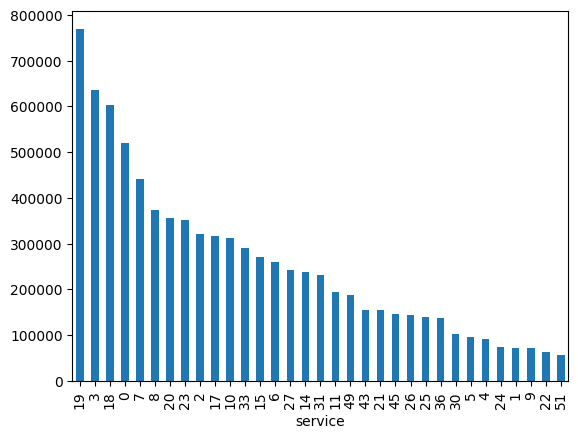

In [116]:
dataset1["salary"].plot.bar();

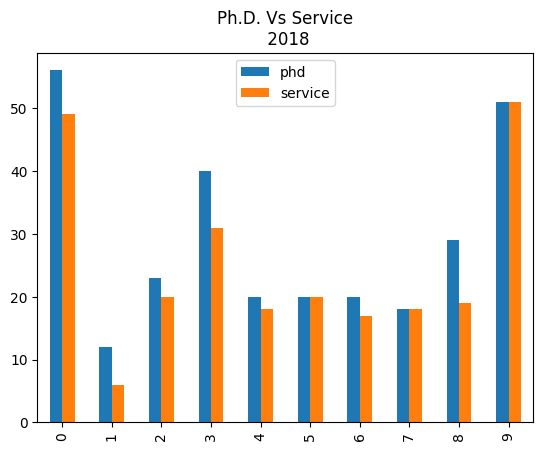

In [117]:
dataset[[ 'phd', 'service' ]].head(10).plot.bar(title="Ph.D. Vs Service\n 2018");

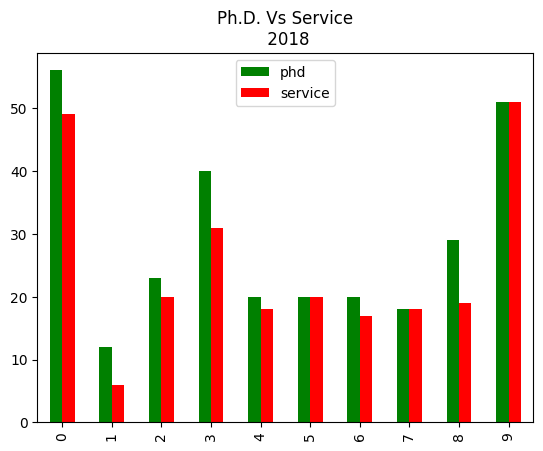

In [118]:
dataset[['phd', 'service']].head(10).plot.bar(title="Ph.D. Vs Service\n 2018" , color=['g','red']);

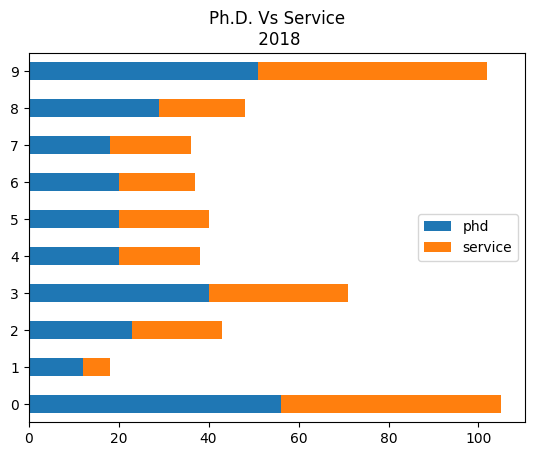

In [119]:
dataset[['phd', 'service']].head(10).plot.barh(title="Ph.D. Vs Service\n 2018", stacked=True);

<a id="tartas"></a>
## Tartas
Los gráficos circulares o de tarta son útiles para comparar partes de un todo. No muestran cambios en el tiempo. El gráfico circular es útil para comparar un número de variables pequeño.

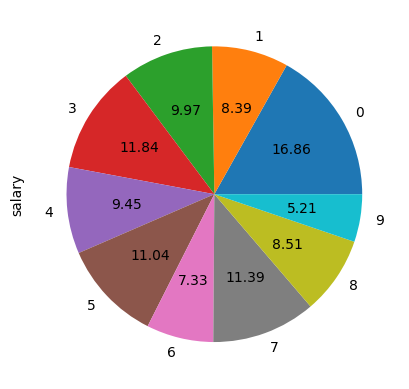

In [120]:
dataset["salary"].head(10).plot.pie(autopct='%.2f');

<a id="cajas"></a>
## Cajas
La gráfica de caja se usa para comparar variables usando algunos valores estadísticos (media y cuantiles generalmente). Las variables comparables deben ser de las mismas unidades de datos.

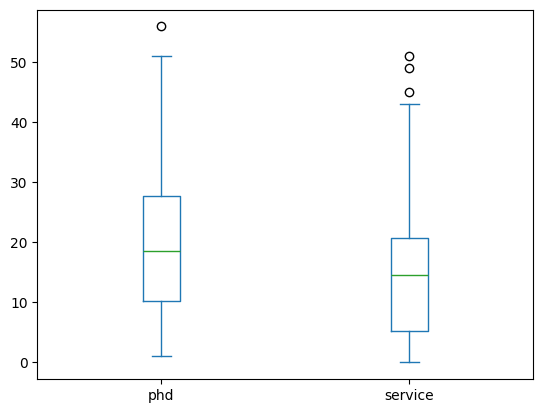

In [121]:
dataset[["phd","service"]].plot.box();

<a id="histiogramas"></a>
## Histiogramas
Se puede usar un histograma para representar una variable específica o un conjunto de variables.

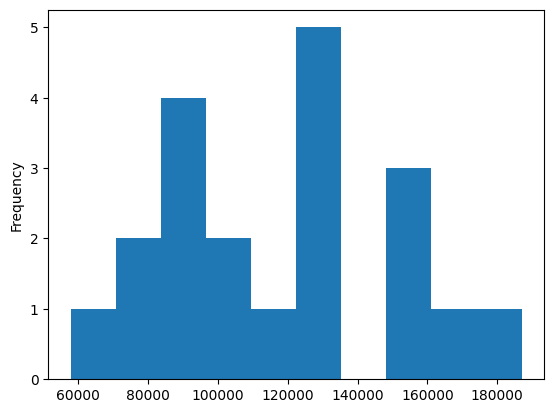

In [122]:
dataset["salary"].head(20).plot.hist();

<a id="dispersion"></a>
## Gráficos de dispersión
Un diagrama de dispersión muestra la relación entre dos factores de un experimento. Se utiliza una línea de tendencia para determinar la correlación positiva, negativa o nula.

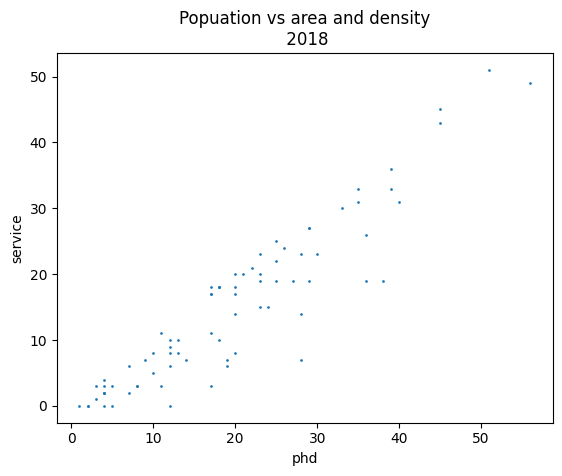

In [123]:
dataset.plot(kind='scatter', x='phd', y='service', title='Popuation vs area and density\n 2018', s=0.9);

---